***
# 3.1 First Order Syntax for Bird 26
### JX, 03/15/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = 'Bird26'
iterations = 100

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

## Make a copy of recursively generated labels
#note_df['lasso_labels'] = note_df['recur_labels_id']

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels
0,0,2.530000,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-7.5537066, 8.209083]",21,21|0|1.0|1.0|0.0|nan|nan|nan|nan,154,4
1,0,2.530000,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6834063, 9.239816]",11,11|0|0.0|1.0|0.0|1.0|0.0|0.0|nan,14,2
2,0,2.530000,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.5902307, -12.39612]",0,0|0|0.0|0.0|1.0|0.0|nan|nan|nan,1,0
3,0,2.530000,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7.0395265, 3.0541244]",26,26|1|1.0|0.0|nan|nan|nan|nan|nan,206,19
4,1,7.660000,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1442027, -3.2366111]",12,12|1|0.0|1.0|0.0|nan|nan|nan|nan,37,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1426,7451.938961,7454.270021,2.331060,11,6,7453.230000,7453.347846,0.117846,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 0.00020218813079315542, 0.00039304040322...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.835227, 3.594297]",25,25|1|1.0|1.0|0.0|0.0|nan|nan|nan,195,17
10862,1426,7451.938961,7454.270021,2.331060,11,7,7453.430000,7453.582862,0.152862,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -6.027892231941223e-05, -0.000147847971...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1574388, 3.9381824]",25,25|0|0.0|0.0|nan|nan|nan|nan|nan,188,11
10863,1426,7451.938961,7454.270021,2.331060,11,8,7453.582862,7453.644792,0.061930,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.0007704722401279731, -0.002082758701...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.96411866, 1.086623]",19,19|0|0.0|1.0|1.0|0.0|nan|nan|nan,118,9
10864,1426,7451.938961,7454.270021,2.331060,11,9,7453.786119,7453.917918,0.131800,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -2.3817842366836413e-06, -8.17539332897...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.2781262, -6.882173]",9,9|0|0.0|1.0|0.0|nan|nan|nan|nan,234,27


## Normalized Block Entropy of Different Models

In [3]:
import random
import numpy as np
from tqdm.autonotebook import tqdm
import butcherbird.sequential as sequential

/tmp/ipykernel_24930/2375031118.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Random Model

In [4]:
## make 100 sequences
rand_seqs = []

for index in tqdm(np.arange(0, iterations)):
    indv_seq = []

    unique_states = sequential.get_seq_states(note_df['lasso_labels'])[0]
    p_states = sequential.uniform_p_dist(unique_states)

    for note in note_df['lasso_labels']:
        indv_seq.append(random.choices(unique_states, p_states)[0])

    rand_seqs.append(indv_seq)

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
## get 20 normalized entropy values for all 100 sequences
rand_ent = []

for seq in tqdm(rand_seqs):
    rand_ent.append(sequential.seq_block_entropy(seq, 'Random Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [6]:
rand_df = pd.concat(rand_ent)

In [7]:
rand_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Random Song,"[33, 9, 17, 32, 6, 15, 18, 34, 33, 16, 35, 26,...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.02650469353948095, 0.028253267071599485, 0....",0.999521
0,Random Song,"[33|9, 9|17, 17|32, 32|6, 6|15, 15|18, 18|34, ...",2,"[0|0, 0|1, 0|10, 0|11, 0|12, 0|13, 0|14, 0|15,...","[0.0007363092498849517, 0.0006442705936493328,...",0.990967
0,Random Song,"[33|9|17, 9|17|32, 17|32|6, 32|6|15, 6|15|18, ...",3,"[0|0|11, 0|0|19, 0|0|2, 0|0|24, 0|0|34, 0|0|36...","[9.204712812960235e-05, 9.204712812960235e-05,...",0.995929
0,Random Song,"[33|9|17|32, 9|17|32|6, 17|32|6|15, 32|6|15|18...",4,"[0|0|11|7, 0|0|19|27, 0|0|24|23, 0|0|2|18, 0|0...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.999874
0,Random Song,"[33|9|17|32|6, 9|17|32|6|15, 17|32|6|15|18, 32...",5,"[0|0|11|7|12, 0|0|19|27|30, 0|0|24|23|5, 0|0|2...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.999996
...,...,...,...,...,...,...
0,Random Song,"[36|31|6|22|26|2|29|10|4|21|35|4|26|30|13|36, ...",16,"[0|0|0|9|21|24|30|10|13|21|15|10|9|14|22|5, 0|...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",1.000000
0,Random Song,[36|31|6|22|26|2|29|10|4|21|35|4|26|30|13|36|1...,17,"[0|0|0|9|21|24|30|10|13|21|15|10|9|14|22|5|19,...","[9.216589861751152e-05, 9.216589861751152e-05,...",1.000000
0,Random Song,[36|31|6|22|26|2|29|10|4|21|35|4|26|30|13|36|1...,18,[0|0|0|9|21|24|30|10|13|21|15|10|9|14|22|5|19|...,"[9.217439395335975e-05, 9.217439395335975e-05,...",1.000000
0,Random Song,[36|31|6|22|26|2|29|10|4|21|35|4|26|30|13|36|1...,19,[0|0|0|9|21|24|30|10|13|21|15|10|9|14|22|5|19|...,"[9.218289085545723e-05, 9.218289085545723e-05,...",1.000000


### Zero-order model

In [8]:
## make 100 sequences
zero_seqs = []

for index in tqdm(np.arange(0, iterations)):
    zero_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'zero'))

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
## get 20 normalized entropy values for all 100 sequences
zero_ent = []

for seq in tqdm(zero_seqs):
    zero_ent.append(sequential.seq_block_entropy(seq, 'Zero-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [10]:
zero_df = pd.concat(zero_ent)

In [11]:
zero_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Zero-Order Song,"[21, 16, 2, 28, 20, 8, 33, 23, 24, 2, 12, 19, ...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.03395913859745997, 0.009479109147800478, 0....",0.936199
0,Zero-Order Song,"[21|16, 16|2, 2|28, 28|20, 20|8, 8|33, 33|23, ...",2,"[0|0, 0|1, 0|10, 0|11, 0|12, 0|13, 0|14, 0|15,...","[0.0011044638748274275, 0.00018407731247123792...",0.947114
0,Zero-Order Song,"[21|16|2, 16|2|28, 2|28|20, 28|20|8, 20|8|33, ...",3,"[0|0|1, 0|0|10, 0|0|13, 0|0|14, 0|0|2, 0|0|22,...","[9.204712812960235e-05, 9.204712812960235e-05,...",0.989936
0,Zero-Order Song,"[21|16|2|28, 16|2|28|20, 2|28|20|8, 28|20|8|33...",4,"[0|0|10|27, 0|0|13|34, 0|0|14|16, 0|0|1|28, 0|...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.999562
0,Zero-Order Song,"[21|16|2|28|20, 16|2|28|20|8, 2|28|20|8|33, 28...",5,"[0|0|10|27|8, 0|0|13|34|1, 0|0|14|16|24, 0|0|1...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.999973
...,...,...,...,...,...,...
0,Zero-Order Song,"[4|12|13|5|27|19|4|6|18|15|34|1|31|15|0|4, 12|...",16,"[0|0|0|21|1|22|4|33|2|16|0|15|7|10|19|32, 0|0|...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",1.000000
0,Zero-Order Song,"[4|12|13|5|27|19|4|6|18|15|34|1|31|15|0|4|0, 1...",17,"[0|0|0|21|1|22|4|33|2|16|0|15|7|10|19|32|19, 0...","[9.216589861751152e-05, 9.216589861751152e-05,...",1.000000
0,Zero-Order Song,[4|12|13|5|27|19|4|6|18|15|34|1|31|15|0|4|0|23...,18,"[0|0|0|21|1|22|4|33|2|16|0|15|7|10|19|32|19|6,...","[9.217439395335975e-05, 9.217439395335975e-05,...",1.000000
0,Zero-Order Song,[4|12|13|5|27|19|4|6|18|15|34|1|31|15|0|4|0|23...,19,[0|0|0|21|1|22|4|33|2|16|0|15|7|10|19|32|19|6|...,"[9.218289085545723e-05, 9.218289085545723e-05,...",1.000000


## First-Order Model

In [12]:
## make 100 sequences
first_seqs = []

for index in tqdm(np.arange(0, iterations)):
    first_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'first'))

  0%|          | 0/100 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

In [13]:
## get 20 normalized entropy values for all 100 sequences
first_ent = []

for seq in tqdm(first_seqs):
    first_ent.append(sequential.seq_block_entropy(seq, 'First-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [14]:
first_df = pd.concat(first_ent)

In [15]:
first_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,First-Order Song,"[27, 23, 14, 7, 9, 23, 1, 15, 9, 8, 24, 28, 10...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.03506350082827167, 0.010307380820909259, 0....",0.940255
0,First-Order Song,"[27|23, 23|14, 14|7, 7|9, 9|23, 23|1, 1|15, 15...",2,"[0|15, 0|18, 0|19, 0|4, 0|5, 0|8, 10|12, 10|16...","[9.203865623561896e-05, 0.00018407731247123792...",0.752909
0,First-Order Song,"[27|23|14, 23|14|7, 14|7|9, 7|9|23, 9|23|1, 23...",3,"[0|15|9, 0|18|22, 0|18|8, 0|19|0, 0|19|1, 0|19...","[9.204712812960235e-05, 9.204712812960235e-05,...",0.776784
0,First-Order Song,"[27|23|14|7, 23|14|7|9, 14|7|9|23, 7|9|23|1, 9...",4,"[0|15|9|23, 0|18|22|5, 0|18|8|24, 0|19|0|19, 0...","[9.205560158335634e-05, 9.205560158335634e-05,...",0.821139
0,First-Order Song,"[27|23|14|7|9, 23|14|7|9|23, 14|7|9|23|1, 7|9|...",5,"[0|15|9|23|14, 0|18|22|5|4, 0|18|8|24|32, 0|19...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.864674
...,...,...,...,...,...,...
0,First-Order Song,"[12|15|9|23|14|3|29|0|19|4|2|21|26|13|28|10, 1...",16,"[0|10|16|8|24|28|8|24|32|10|16|18|4|2|0|8, 0|1...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",0.999305
0,First-Order Song,[12|15|9|23|14|3|29|0|19|4|2|21|26|13|28|10|16...,17,"[0|10|16|8|24|28|8|24|32|10|16|18|4|2|0|8|24, ...","[9.216589861751152e-05, 9.216589861751152e-05,...",0.999558
0,First-Order Song,[12|15|9|23|14|3|29|0|19|4|2|21|26|13|28|10|16...,18,[0|10|16|8|24|28|8|24|32|10|16|18|4|2|0|8|24|2...,"[9.217439395335975e-05, 9.217439395335975e-05,...",0.999708
0,First-Order Song,[12|15|9|23|14|3|29|0|19|4|2|21|26|13|28|10|16...,19,[0|10|16|8|24|28|8|24|32|10|16|18|4|2|0|8|24|2...,"[9.218289085545723e-05, 9.218289085545723e-05,...",0.999795


## Second-Order model

In [16]:
## make 100 sequences
second_seqs = []

for index in tqdm(np.arange(0, iterations)):
    second_seqs.append(sequential.syn_seq_gen(note_df, label = 'lasso_labels', order = 'second'))

  0%|          | 0/100 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


  0%|          | 0/10866 [00:00<?, ?it/s]

In [17]:
## get 20 normalized entropy values for all 100 sequences
second_ent = []

for seq in tqdm(second_seqs):
    second_ent.append(sequential.seq_block_entropy(seq, 'Second-Order Song', 21))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

In [18]:
second_df = pd.concat(second_ent)

In [19]:
second_df

,song_type,song,block_size,unique_states,p_states,normalized_block_entropy
0,Second-Order Song,"[2, 0, 19, 22, 5, 17, 11, 12, 27, 23, 4, 2, 0,...",1,"[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[0.0357077121295785, 0.009479109147800478, 0.0...",0.935464
0,Second-Order Song,"[2|0, 0|19, 19|22, 22|5, 5|17, 17|11, 11|12, 1...",2,"[0|10, 0|18, 0|19, 0|4, 0|5, 0|7, 0|8, 10|10, ...","[0.00018407731247123792, 0.0002761159687068568...",0.748698
0,Second-Order Song,"[2|0|19, 0|19|22, 19|22|5, 22|5|17, 5|17|11, 1...",3,"[0|10|17, 0|18|1, 0|18|22, 0|19|0, 0|19|1, 0|1...","[0.0001840942562592047, 0.0001840942562592047,...",0.772396
0,Second-Order Song,"[2|0|19|22, 0|19|22|5, 19|22|5|17, 22|5|17|11,...",4,"[0|10|17|17, 0|18|1|15, 0|18|22|5, 0|19|0|5, 0...","[0.0001841112031667127, 0.0001841112031667127,...",0.802893
0,Second-Order Song,"[2|0|19|22|5, 0|19|22|5|17, 19|22|5|17|11, 22|...",5,"[0|10|17|17|10, 0|10|17|17|18, 0|18|1|15|33, 0...","[9.206407659731172e-05, 9.206407659731172e-05,...",0.836782
...,...,...,...,...,...,...
0,Second-Order Song,"[24|32|8|24|32|10|16|4|2|21|26|27|13|28|8|32, ...",16,"[0|15|17|22|5|17|11|12|8|24|32|8|24|32|10|16, ...","[9.21574048474795e-05, 9.21574048474795e-05, 9...",0.997499
0,Second-Order Song,[24|32|8|24|32|10|16|4|2|21|26|27|13|28|8|32|1...,17,[0|15|17|22|5|17|11|12|8|24|32|8|24|32|10|16|1...,"[9.216589861751152e-05, 9.216589861751152e-05,...",0.998550
0,Second-Order Song,[24|32|8|24|32|10|16|4|2|21|26|27|13|28|8|32|1...,18,[0|15|17|22|5|17|11|12|8|24|32|8|24|32|10|16|1...,"[9.217439395335975e-05, 9.217439395335975e-05,...",0.999136
0,Second-Order Song,[24|32|8|24|32|10|16|4|2|21|26|27|13|28|8|32|1...,19,[0|15|17|22|5|17|11|12|8|24|32|8|24|32|10|16|1...,"[9.218289085545723e-05, 9.218289085545723e-05,...",0.999460


### True Song

In [20]:
true_df = sequential.seq_block_entropy(note_df['lasso_labels'], 'True Song', 21)

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/sequential.py:301: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_block_entropy = seq_block_entropy.append(
/home/AD/j8xing/

## Add everything together

In [21]:
block_entropy_vis = pd.concat([true_df, rand_df, zero_df, first_df, second_df])

In [22]:
block_entropy_vis = block_entropy_vis.reset_index()

## Plot all models with confidence intervals

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

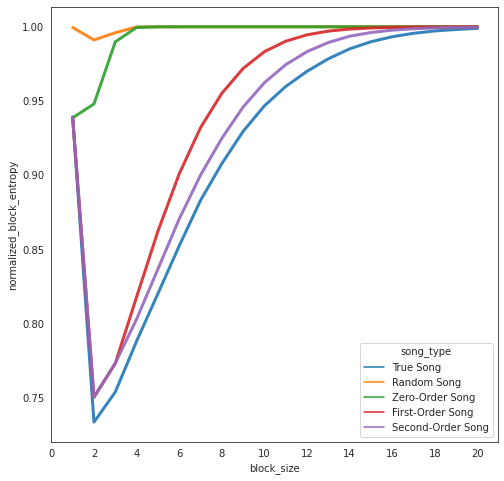

In [41]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.lineplot(data = block_entropy_vis, x = 'block_size', y = 'normalized_block_entropy', hue = 'song_type', lw = 3, err_style="bars", ci=0.95, alpha = 0.9)

sns.set_style("white")
palette = sns.color_palette("mako_r", 6)

ax.set_xticks(np.arange(0, 21, step = 2))

plt.savefig('long_range.svg')

plt.show()